### 1️⃣ Introduction — Kernel Density Estimation (KDE) 🌊

**KDE** is a **non-parametric method** to estimate the **probability density function (PDF)** of a dataset.  

- **Goal:** understand data distribution and detect low-density regions (anomalies).  
- **Type:** Density estimation / unsupervised learning.  
- **Applications:**  
  - Anomaly detection (points in low-density regions)  
  - Data smoothing & visualization  
  - Pattern analysis in high-dimensional data


### 2️⃣ Intuition Behind KDE 🧠

- KDE places a **kernel (smooth function)** on each data point and sums them to get a smooth estimate of the probability density.  
- Popular kernels: **Gaussian**, Epanechnikov, Tophat.  
- Bandwidth ($h$) controls **smoothness**:  
  - Small $h$ → wiggly estimate (overfitting)  
  - Large $h$ → overly smooth (underfitting)

**Visualization idea:** imagine placing a small bell curve on each point and adding all curves together.


### 3️⃣ KDE Equation ✏️

For a dataset $X = \{x_1, x_2, \dots, x_n\}$:

$$
\hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
$$

Where:  
- $K$ = kernel function (e.g., Gaussian)  
- $h$ = bandwidth (smoothing parameter)  
- $n$ = number of data points

**Gaussian Kernel:**

$$
K(u) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{u^2}{2}\right)
$$


### 4️⃣ Step-by-Step Algorithm 🧩

1. Choose a **kernel function** $K(u)$.  
2. Choose a **bandwidth** $h$ (controls smoothness).  
3. For each evaluation point $x$, compute:

$$
\hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
$$

4. Plot or use $\hat{f}(x)$ to visualize density.  
5. For **anomaly detection**: points in **low-density regions** ($\hat{f}(x) < \text{threshold}$) are considered anomalies.


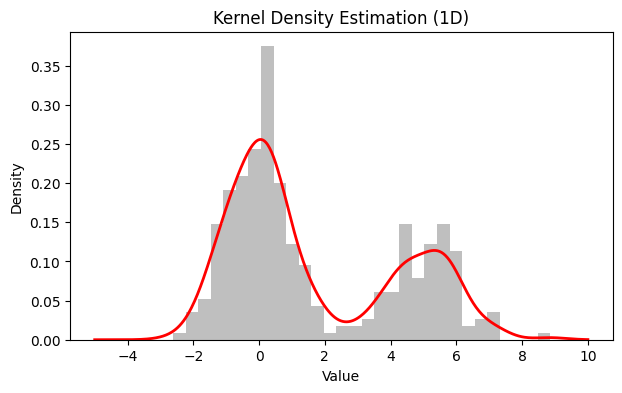

In [1]:
### 5️⃣ KDE Implementation — Example (1D)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate synthetic 1D data
np.random.seed(42)
X = np.concatenate([np.random.normal(0, 1, 200), np.random.normal(5, 1, 100)])
X = X[:, np.newaxis]  # reshape for sklearn

# Fit KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde.fit(X)

# Evaluate density on grid
x_grid = np.linspace(-5, 10, 500)[:, np.newaxis]
log_density = kde.score_samples(x_grid)
density = np.exp(log_density)

# Plot
plt.figure(figsize=(7,4))
plt.hist(X, bins=30, density=True, alpha=0.5, color='gray')
plt.plot(x_grid, density, color='red', lw=2)
plt.title('Kernel Density Estimation (1D)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


### 6️⃣ Multivariate KDE 🌐

For multi-dimensional data $X \in \mathbb{R}^d$:

$$
\hat{f}(x) = \frac{1}{n h^d} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
$$

- Often uses **Gaussian kernel** with covariance matrix $\Sigma$.  
- Useful for anomaly detection in high-dimensional datasets.


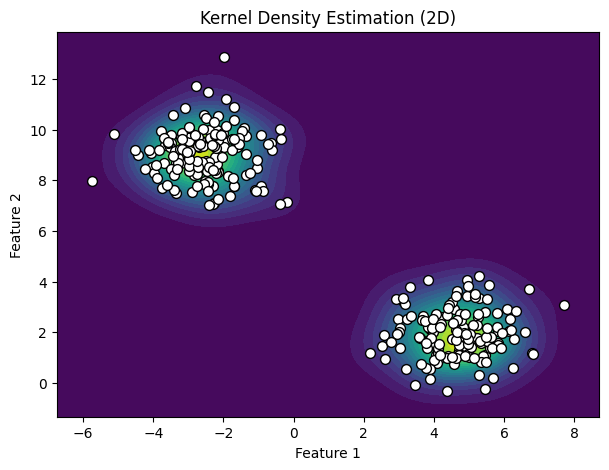

In [2]:
### 7️⃣ KDE Example — 2D
from sklearn.datasets import make_blobs

# Generate synthetic 2D data
X2, _ = make_blobs(n_samples=300, centers=2, cluster_std=1.0, random_state=42)

# Fit KDE
kde2 = KernelDensity(kernel='gaussian', bandwidth=0.7)
kde2.fit(X2)

# Evaluate density on grid
x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.vstack([xx.ravel(), yy.ravel()]).T
log_density2 = kde2.score_samples(grid)
density2 = np.exp(log_density2).reshape(xx.shape)

# Plot
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, density2, levels=20, cmap='viridis')
plt.scatter(X2[:,0], X2[:,1], c='white', edgecolor='k', s=50)
plt.title('Kernel Density Estimation (2D)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### 8️⃣ Using KDE for Anomaly Detection ⚡

- **Idea:** anomalies appear in regions with **low density**.  
- Threshold can be set based on percentile of estimated density.  

$$
\text{Anomaly if } \hat{f}(x) < \text{threshold}
$$


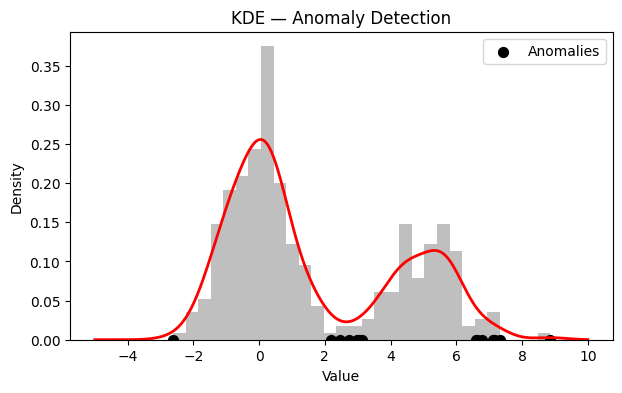

In [4]:
### 9️⃣ KDE for 1D Anomaly Detection (Fixed)
# Compute log density at original data points
log_density_X = kde.score_samples(X)
density_X = np.exp(log_density_X)

# Set threshold for anomalies (bottom 5%)
threshold = np.percentile(density_X, 5)
anomalies = X[density_X < threshold]

# Plot
plt.figure(figsize=(7,4))
plt.hist(X, bins=30, density=True, alpha=0.5, color='gray')
plt.plot(x_grid, density, color='red', lw=2)
plt.scatter(anomalies, np.zeros_like(anomalies), color='black', s=50, label='Anomalies')
plt.title('KDE — Anomaly Detection')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


### 🔟 Advantages, Limitations & Use Cases ✅

**Advantages:**
- Non-parametric → no assumption on data distribution.  
- Smooth density estimation.  
- Handles multimodal distributions.  
- Useful for anomaly detection without labeled data.

**Limitations:**
- Sensitive to bandwidth choice.  
- Computationally expensive for large datasets.  
- Curse of dimensionality in high-dimensional spaces.

**Best Use Cases:**
- Detecting rare events or outliers.  
- Smoothing histograms or estimating PDF.  
- Exploratory data analysis and visualization.
